<a href="https://colab.research.google.com/github/benedikt-korbach/remote-sensing-of-parking-areas/blob/main/03d_create_train_val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages, mount drive, set wd

In [64]:
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import datetime
import random
import shutil
from PIL import Image
from collections import Counter

In [65]:
#from google.colab import drive
#drive.mount('/content/drive')

In [66]:
# Set wd
#os.chdir("/Users/benediktkorbach/Documents/GitHub/remote-sensing-of-parking-areas")
#os.chdir("/content/drive/MyDrive/Master Thesis")

# Set wd
os.chdir('/Users/benediktkorbach/Documents/GitHub/remote-sensing-of-parking-areas')

print("Working directory:", os.getcwd())


Working directory: /Users/benediktkorbach/Documents/GitHub/remote-sensing-of-parking-areas


# Check train_validate_images_masks

In [67]:
def count_files_in_folder(folder_path):
    """Counts the number of files in the specified folder."""
    # List all entries in the folder
    entries = os.listdir(folder_path)

    # Count only files
    file_count = sum(os.path.isfile(os.path.join(folder_path, entry)) for entry in entries)

    return file_count

In [68]:
# Count images and masks
mask_path = "03_create_masks/train_validate_images_masks_128/masks"
image_path = "03_create_masks/train_validate_images_masks_128/images"

num_masks = count_files_in_folder(mask_path)
num_images = count_files_in_folder(image_path)

print(f"There are {num_images} images and {num_masks} masks in the folders {image_path} and {mask_path} respectively.")

There are 75828 images and 75828 masks in the folders 03_create_masks/train_validate_images_masks_128/images and 03_create_masks/train_validate_images_masks_128/masks respectively.


There are 4,516 images/masks in the train_validate_images_masks folder.

# Reduce background images/masks

In [69]:
def create_target_dirs(target_dir):
    """Create target directories for images and masks."""
    os.makedirs(target_dir, exist_ok=True)
    os.makedirs(os.path.join(target_dir, "images"), exist_ok=True)
    os.makedirs(os.path.join(target_dir, "masks"), exist_ok=True)

def reduce_background_images(image_folder, mask_folder, target_folder, black_mask_inclusion_prob=0.061117):
    """
    Reduces the number of pure background images by selecting black_mask_inclusion_prob percent of pure background images.
    """
    # Create target directory
    create_target_dirs(target_folder)

    # Initialize counters for sanity check
    image_counter = 0
    parking_images_copied = 0
    background_images_copied = 0
    background_images_discarded = 0

    # Initialize start time
    start_time = datetime.datetime.now()
    print(f"Copying started at {start_time.strftime('%Y-%m-%d %H:%M:%S')}")

    # Loop through every image/mask
    for img_name in sorted(os.listdir(image_folder)):
        if not img_name.lower().endswith(".png"):
            continue

        image_counter += 1

        img_path = os.path.join(image_folder, img_name)
        mask_path = os.path.join(mask_folder, img_name)

        # Check if the mask is completely black (background)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if np.unique(mask).size == 1 and np.unique(mask)[0] == 0:
            # Include the black mask with a certain probability
            if random.random() < black_mask_inclusion_prob:
                shutil.copy(img_path, os.path.join(target_folder, "images", img_name))
                shutil.copy(mask_path, os.path.join(target_folder, "masks", img_name))
                print(f"Background added: {img_name}")
                background_images_copied += 1
            else:
                background_images_discarded += 1
        else:
            # Include every non-background image
            shutil.copy(img_path, os.path.join(target_folder, "images", img_name))
            shutil.copy(mask_path, os.path.join(target_folder, "masks", img_name))
            print(f"Parking added: {img_name}")
            parking_images_copied += 1

    # Stop time and calculate total copied
    now = datetime.datetime.now()
    duration = (now - start_time).total_seconds()
    total_copied = background_images_copied + parking_images_copied

    # Output copies made by category
    print(f"Finished copying at {now.strftime('%Y-%m-%d %H:%M:%S')} in {duration:.2f} seconds.")
    print(f"Total evaluated: {image_counter}")
    print(f"Total background discarded: {background_images_discarded}")
    print(f"Total copied: {total_copied}")
    print(f"thereof parking: {parking_images_copied}")
    print(f"thereof background: {background_images_copied}")

In [70]:
# Reduce the number of pure background images and save them in the target folder

image_folder = "03_create_masks/train_validate_images_masks_128/images"
mask_folder = "03_create_masks/train_validate_images_masks_128/masks"
target_folder = "03_create_masks/train_validate_images_masks_reduced_128"
reduce_background_images(image_folder, mask_folder, target_folder)

Copying started at 2024-04-23 16:04:20
Background added: lon_10.0214344_lat_54.2446698_Rumohr_0_6.png
Background added: lon_10.0214344_lat_54.2446698_Rumohr_11_12.png
Background added: lon_10.0214344_lat_54.2446698_Rumohr_11_13.png
Background added: lon_10.0214344_lat_54.2446698_Rumohr_11_15.png
Background added: lon_10.0214344_lat_54.2446698_Rumohr_13_9.png
Background added: lon_10.0214344_lat_54.2446698_Rumohr_15_16.png
Background added: lon_10.0214344_lat_54.2446698_Rumohr_15_7.png
Background added: lon_10.0214344_lat_54.2446698_Rumohr_16_11.png
Background added: lon_10.0214344_lat_54.2446698_Rumohr_16_17.png
Background added: lon_10.0214344_lat_54.2446698_Rumohr_17_2.png
Background added: lon_10.0214344_lat_54.2446698_Rumohr_17_4.png
Background added: lon_10.0214344_lat_54.2446698_Rumohr_17_7.png
Parking added: lon_10.0214344_lat_54.2446698_Rumohr_1_13.png
Parking added: lon_10.0214344_lat_54.2446698_Rumohr_1_14.png
Parking added: lon_10.0214344_lat_54.2446698_Rumohr_2_14.png
Parki

Main experiment: From the 4,516 evaluated images, 2,907 were discarded as pure background images. The final dataset contains 1,609 images, of which 842 include parking spaces as well as 767 pure background images.

Tiling experiment 256: From the 18,663 evaluated images, 14,994 were discarded as pure background images. The final dataset contains 3,669 images, of which 1,933 include parking spaces as well as 1,736 pure background images.

Tiling experiment 128: From the 75,828 evaluated images, 66,672 were discarded as pure background images. The final dataset contains 9,156 images, of which 4,768 include parking spaces as well as 4,388 pure background images.

# Create train/val folder

In [71]:
def report_parking_counts(base_input_path):
    """
    Groups images based on unique identifiers and creates a count table of service stations by the number of parking tiles.
    """
    # Define directories
    images_dir = os.path.join(base_input_path, "images")
    masks_dir = os.path.join(base_input_path, "masks")

    # Retrieve and sort filenames
    image_files = [f for f in os.listdir(images_dir) if f.endswith('.png')]
    mask_files = [f for f in os.listdir(masks_dir) if f.endswith('.png')]
    image_files.sort()
    mask_files.sort()

    # Group by source image
    groups = {}
    for file_name in image_files:
        group_key = '_'.join(file_name.split('_')[:5])  # Adjust split index to capture correct unique image identifier
        if group_key not in groups:
            groups[group_key] = []
        groups[group_key].append(file_name)

    # Calculate the number of tiles containing parking in each group
    parking_counts = {}
    for group in groups:
        parking_tiles_count = 0
        for file_name in groups[group]:
            mask_path = os.path.join(masks_dir, file_name.replace('images', 'masks'))
            mask = Image.open(mask_path)
            mask_array = np.array(mask)
            if np.any(mask_array == 100) or np.any(mask_array == 200) or np.any(mask_array == 250):  # Check for any parking type
                parking_tiles_count += 1
        if parking_tiles_count not in parking_counts:
            parking_counts[parking_tiles_count] = 0
        parking_counts[parking_tiles_count] += 1

    # Print count table of parking tiles
    print("Count of parking tiles per service station:")
    for count, num_stations in sorted(parking_counts.items()):
        print(f"{count} parking tiles: {num_stations} service stations")

In [52]:
# Example of using the function
base_input_path = "03_create_masks/train_validate_images_masks_reduced_128"
report_parking_counts(base_input_path)

Count of parking tiles per service station:
0 parking tiles: 35 service stations
1 parking tiles: 1 service stations
2 parking tiles: 2 service stations
3 parking tiles: 2 service stations
4 parking tiles: 1 service stations
5 parking tiles: 2 service stations
6 parking tiles: 3 service stations
7 parking tiles: 3 service stations
8 parking tiles: 3 service stations
9 parking tiles: 1 service stations
10 parking tiles: 3 service stations
11 parking tiles: 6 service stations
12 parking tiles: 5 service stations
13 parking tiles: 9 service stations
14 parking tiles: 4 service stations
15 parking tiles: 7 service stations
16 parking tiles: 7 service stations
17 parking tiles: 7 service stations
18 parking tiles: 8 service stations
19 parking tiles: 4 service stations
20 parking tiles: 5 service stations
21 parking tiles: 3 service stations
22 parking tiles: 5 service stations
23 parking tiles: 4 service stations
24 parking tiles: 4 service stations
25 parking tiles: 4 service stations
26 

In [72]:
def split_and_copy_data(base_input_path, test_size=0.2, random_seed=42):
    """
    Splits data into training and validation sets ensuring no image is split across sets,
    and stratifies groups by the number of tiles containing parking, with a special category for more than 10 parking tiles.
    """
    # Define directories
    images_dir = os.path.join(base_input_path, "images")
    masks_dir = os.path.join(base_input_path, "masks")
    train_image_dir = os.path.join(base_input_path, "train", "images")
    train_mask_dir = os.path.join(base_input_path, "train", "masks")
    val_image_dir = os.path.join(base_input_path, "val", "images")
    val_mask_dir = os.path.join(base_input_path, "val", "masks")

    # Create directories
    os.makedirs(train_image_dir, exist_ok=True)
    os.makedirs(train_mask_dir, exist_ok=True)
    os.makedirs(val_image_dir, exist_ok=True)
    os.makedirs(val_mask_dir, exist_ok=True)

    # Retrieve and sort filenames
    image_files = [f for f in os.listdir(images_dir) if f.endswith('.png')]
    mask_files = [f for f in os.listdir(masks_dir) if f.endswith('.png')]
    image_files.sort()
    mask_files.sort()

    # Group by source image
    groups = {}
    for file_name in image_files:
        group_key = '_'.join(file_name.split('_')[:5])  # Adjust split index to capture correct unique image identifier
        if group_key not in groups:
            groups[group_key] = []
        groups[group_key].append(file_name)

    # Calculate the number of tiles containing parking in each group
    parking_counts = []
    for group in groups:
        parking_tiles_count = 0
        for file_name in groups[group]:
            mask_path = os.path.join(masks_dir, file_name.replace('images', 'masks'))
            mask = Image.open(mask_path)
            mask_array = np.array(mask)
            if np.any(mask_array == 100) or np.any(mask_array == 200) or np.any(mask_array == 250):  # Check for any parking type
                parking_tiles_count += 1
        # Stratify with a special category for more than 10 parking tiles
        #parking_counts.append(min(parking_tiles_count, 22) if parking_tiles_count <= 22 else 23)

    # Split data using stratification by number of parking tiles
    try:
        groups_train, groups_val = train_test_split(list(groups.keys()), test_size=test_size, random_state=random_seed, stratify=parking_counts)
    except ValueError as e:
        print("Error with stratification:", e)
        # Fall back to non-stratified split if stratification fails
        groups_train, groups_val = train_test_split(list(groups.keys()), test_size=test_size, random_state=random_seed)

    # Copy function redefined to handle grouped data
    def copy_grouped_files(group_keys, src_dir, dest_dir):
        for key in group_keys:
            for file_name in groups[key]:
                src_file_path = os.path.join(src_dir, file_name)
                dest_file_path = os.path.join(dest_dir, file_name)
                shutil.copy(src_file_path, dest_file_path)

    # Copy files to respective directories
    copy_grouped_files(groups_train, images_dir, train_image_dir)
    copy_grouped_files(groups_train, masks_dir, train_mask_dir)
    copy_grouped_files(groups_val, images_dir, val_image_dir)
    copy_grouped_files(groups_val, masks_dir, val_mask_dir)

    print(f"Data successfully split and copied.\nTraining images: {len(groups_train)}, Validation images: {len(groups_val)}")

In [73]:
# Create training and validation folders
base_input_path = "03_create_masks/train_validate_images_masks_reduced_128"
split_and_copy_data(base_input_path, test_size=0.2, random_seed=42)

Error with stratification: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
Data successfully split and copied.
Training images: 177, Validation images: 45


In [83]:
def count_image_intensities(folder_dir):
    """
    Count car, truck and pure background masks in folder.
    """
    count_all_zero = 0
    count_include_100 = 0
    count_include_200 = 0
    count_include_250 = 0
    count_include_100_200_250 = 0

    # Iterate through all image files in the folder
    for filename in os.listdir(folder_dir):
        if filename.lower().endswith('.png'):
            img_path = os.path.join(folder_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Check if the entire image is black
            if np.all(img == 0):
                count_all_zero += 1

            # Check if the image includes pixel intensities of 100
            if np.any(img == 100):
                count_include_100 += 1

            # Check if the image includes pixel intensities of 200
            if np.any(img == 200):
                count_include_200 += 1

            # Check if the image includes pixel intensities of 250
            if np.any(img == 250):
                count_include_250 += 1

            # Check if the image includes pixel intensities of 100 or 200
            if np.any(img == 100) or np.any(img == 200) or np.any(img == 250):
                count_include_100_200_250 += 1

    total_count = count_all_zero + count_include_100_200_250

    return total_count, count_all_zero, count_include_100, count_include_200, count_include_250, count_include_100_200_250

In [85]:
# Count the instances of car and truck parking as well as background in the train/val folder
train_dir = "03_create_masks/train_validate_images_masks_reduced_128/train/masks"
val_dir = "03_create_masks/train_validate_images_masks_reduced_128/val/masks"

total_count, count_all_zero, count_include_100, count_include_200, count_include_250, count_include_100_200_250 = count_image_intensities(train_dir)

share_parking = round(count_include_100_200_250/total_count, 2)
share_background = round(count_all_zero/total_count, 2)
share_car = round(count_include_100/count_include_100_200_250, 2)
share_truck = round(count_include_200/count_include_100_200_250, 2)
share_quick = round(count_include_250/count_include_100_200_250, 2)

print("Training set:")
print(f"Total count: {total_count}")
print(f"Background images: {count_all_zero}")
print(f"Images including car parking: {count_include_100}")
print(f"Images including truck parking: {count_include_200}")
print(f"Images including quick parking: {count_include_250}")
print(f"Images including car, truck or quick parking: {count_include_100_200_250}")
print(f"Share of parking tiles of total tiles: {share_parking}")
print(f"Share of background tiles of total tiles: {share_background}")
print(f"Share of car parking tiles of parking tiles: {share_car}")
print(f"Share of truck parking tiles of parking tiles: {share_truck}")
print(f"Share of quick parking tiles of parking tiles: {share_quick}")

total_count, count_all_zero, count_include_100, count_include_200, count_include_250, count_include_100_200_250 = count_image_intensities(val_dir)

share_parking = round(count_include_100_200_250/total_count, 2)
share_background = round(count_all_zero/total_count, 2)
share_car = round(count_include_100/count_include_100_200_250, 2)
share_truck = round(count_include_200/count_include_100_200_250, 2)
share_quick = round(count_include_250/count_include_100_200_250, 2)

print("Validation set:")
print(f"Total count: {total_count}")
print(f"Background images: {count_all_zero}")
print(f"Images including car parking: {count_include_100}")
print(f"Images including truck parking: {count_include_200}")
print(f"Images including quick parking: {count_include_250}")
print(f"Images including car, truck or quick parking: {count_include_100_200_250}")
print(f"Share of parking tiles of total tiles: {share_parking}")
print(f"Share of background tiles of total tiles: {share_background}")
print(f"Share of car parking tiles of parking tiles: {share_car}")
print(f"Share of truck parking tiles of parking tiles: {share_truck}")
print(f"Share of quick parking tiles of parking tiles: {share_quick}")

Training set:
Total count: 7264
Background images: 3460
Images including car parking: 1425
Images including truck parking: 2238
Images including quick parking: 1076
Images including car, truck or quick parking: 3804
Share of parking tiles of total tiles: 0.52
Share of background tiles of total tiles: 0.48
Share of car parking tiles of parking tiles: 0.37
Share of truck parking tiles of parking tiles: 0.59
Share of quick parking tiles of parking tiles: 0.28
Validation set:
Total count: 1890
Background images: 926
Images including car parking: 395
Images including truck parking: 529
Images including quick parking: 237
Images including car, truck or quick parking: 964
Share of parking tiles of total tiles: 0.51
Share of background tiles of total tiles: 0.49
Share of car parking tiles of parking tiles: 0.41
Share of truck parking tiles of parking tiles: 0.55
Share of quick parking tiles of parking tiles: 0.25


The training set includes 1,282 tiles, of which 404 include car parking, 445 include truck parking, 261 include quick parking and 712 include car, truck or quick parking. 617 images are pure background images.

The validation set includes 327 images, of which 110 include car parking, 119 include truck parking, 84 include quick parking and 184 include car, truck or quick parking. 150 images are pure background images.

## Create split visualization

In [76]:
def count_image_intensities(folder_dir):
    """
    Count combinations of car, truck, and quick parking masks in folder,
    including total number of tiles.
    """
    combinations = Counter()
    total_tiles = 0

    # Iterate through all image files in the folder
    for filename in os.listdir(folder_dir):
        if filename.lower().endswith('.png'):
            total_tiles += 1
            img_path = os.path.join(folder_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Check combination
            combination = []
            if np.all(img == 0):
                combination.append('Pure Background')
            if np.any(img == 100):
                combination.append('Car')
            if np.any(img == 200):
                combination.append('Truck')
            if np.any(img == 250):
                combination.append('Pull-Off')

            if combination:
                combinations[tuple(combination)] += 1

    return combinations, total_tiles


In [77]:
# Define paths to your image folders
train_dir = "03_create_masks/train_validate_images_masks_reduced_128/train/masks"
val_dir = "03_create_masks/train_validate_images_masks_reduced_128/val/masks"

# Collect data
train_combinations, train_total = count_image_intensities(train_dir)
val_combinations, val_total = count_image_intensities(val_dir)

# Merge data for plotting
all_keys = set(train_combinations.keys()).union(val_combinations.keys())
sorted_keys = sorted(all_keys, key=lambda k: train_combinations.get(k, 0) + val_combinations.get(k, 0), reverse=True)

# Prepare labels and counts for plotting
labels = ['Total'] + [" + ".join(k) for k in sorted_keys]

# Add "Parking" after the name of the labels except for the first one
#labels = [labels[0]] + [labels[1]] + [f"{label} Parking" for label in labels[2:]]

train_counts = [train_total] + [train_combinations.get(k, 0) for k in sorted_keys]
val_counts = [val_total] + [val_combinations.get(k, 0) for k in sorted_keys]


In [78]:
labels

['Total',
 'Pure Background',
 'Truck',
 'Car',
 'Pull-Off',
 'Truck + Pull-Off',
 'Car + Truck',
 'Car + Pull-Off',
 'Car + Truck + Pull-Off']

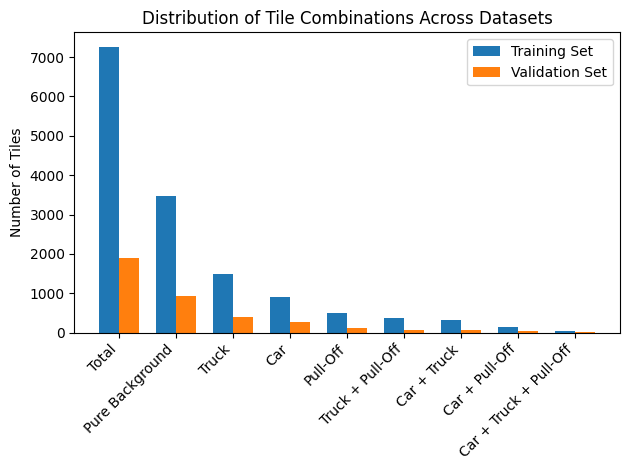

In [79]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_counts, width, label='Training Set')
rects2 = ax.bar(x + width/2, val_counts, width, label='Validation Set')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Tiles')
ax.set_title('Distribution of Tile Combinations Across Datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

fig.tight_layout()

plt.show()


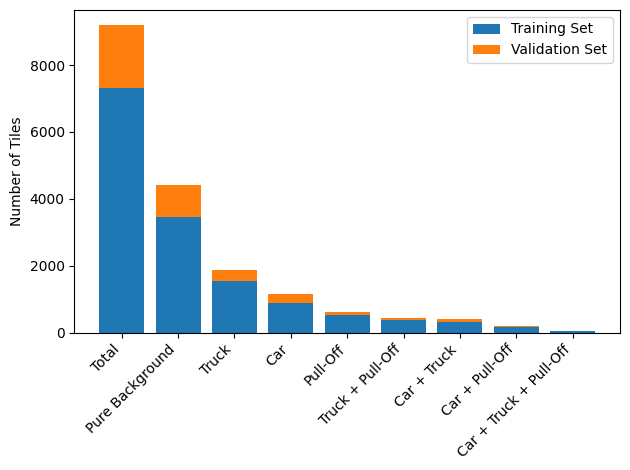

In [61]:
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x, train_counts, label='Training Set')
rects2 = ax.bar(x, val_counts, bottom=train_counts, label='Validation Set')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Tiles')
#ax.set_title('Distribution of Tile Combinations across Datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

fig.tight_layout()

plt.show()

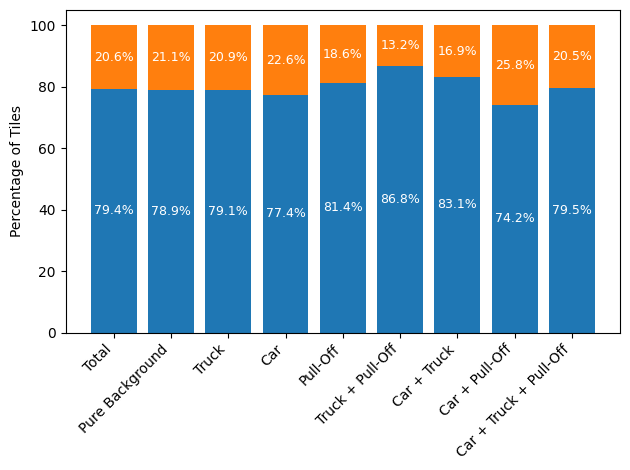

In [80]:
totals = [t + v for t, v in zip(train_counts, val_counts)]  # Total counts for each category

# Normalize counts to percentage
train_percents = [t / total * 100 if total != 0 else 0 for t, total in zip(train_counts, totals)]
val_percents = [v / total * 100 if total != 0 else 0 for v, total in zip(val_counts, totals)]

x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x, train_percents, label='Training Set')
rects2 = ax.bar(x, val_percents, bottom=train_percents, label='Validation Set')

# Add labels with percentages on the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 5:
            ax.annotate(f'{height:.1f}%',
                        xy=(rect.get_x() + rect.get_width() / 2, rect.get_y() + height/2),
                        xytext=(0, 0),
                        textcoords="offset points",
                        ha='center', va='center',
                        color='white', fontsize=9)

add_labels(rects1)
add_labels(rects2)

ax.set_ylabel('Percentage of Tiles')
#ax.set_title('Dataset Share across Tile Combinations')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
#ax.legend()

fig.tight_layout()
plt.show()
